In [1]:
from pynq import Overlay
from pynq import PL
import pynq.lib.dma

OL = Overlay("/home/xilinx/pynq/overlays/WholeNetwork/design_1_wrapper.bit")
OL.download()
OL.ip_dict

{'axi_dma_0': {'addr_range': 65536,
  'device': <pynq.pl_server.device.XlnkDevice at 0xb03065f0>,
  'driver': pynq.lib.dma.DMA,
  'fullpath': 'axi_dma_0',
  'gpio': {},
  'interrupts': {},
  'mem_id': 'S_AXI_LITE',
  'parameters': {'C_BASEADDR': '0x40400000',
   'C_DLYTMR_RESOLUTION': '125',
   'C_ENABLE_MULTI_CHANNEL': '0',
   'C_FAMILY': 'zynq',
   'C_HIGHADDR': '0x4040FFFF',
   'C_INCLUDE_MM2S': '1',
   'C_INCLUDE_MM2S_DRE': '0',
   'C_INCLUDE_MM2S_SF': '1',
   'C_INCLUDE_S2MM': '1',
   'C_INCLUDE_S2MM_DRE': '0',
   'C_INCLUDE_S2MM_SF': '1',
   'C_INCLUDE_SG': '0',
   'C_INCREASE_THROUGHPUT': '0',
   'C_MICRO_DMA': '0',
   'C_MM2S_BURST_SIZE': '8',
   'C_M_AXIS_MM2S_CNTRL_TDATA_WIDTH': '32',
   'C_M_AXIS_MM2S_TDATA_WIDTH': '16',
   'C_M_AXI_MM2S_ADDR_WIDTH': '64',
   'C_M_AXI_MM2S_DATA_WIDTH': '64',
   'C_M_AXI_S2MM_ADDR_WIDTH': '64',
   'C_M_AXI_S2MM_DATA_WIDTH': '64',
   'C_M_AXI_SG_ADDR_WIDTH': '64',
   'C_M_AXI_SG_DATA_WIDTH': '32',
   'C_NUM_MM2S_CHANNELS': '1',
   'C_NUM_S2MM_

In [2]:
# dma_in = OL.axi_dma_in
# dma_out = OL.axi_dma_out
dma = OL.axi_dma_0
# dma_out = OL.axi_dma_s2mm
network = OL.network_0

# dma_in = OL.network_dma.axi_dma_in
# dma_out = OL.network_dma.axi_dma_out
# network = OL.network_dma.network_0

# help(dma_out)

In [3]:
import numpy as np
test_data = np.array(
    [0,    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,  5396, 11885, 10215,  9701,  3854,  2312,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0, 14262, 16318, 16318, 16318, 16318, 15483, 12720, 12720, 12720, 12720, 12720, 12720, 12720, 12720, 10922,  3340,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,  4304,  7324,  4625,  7324, 10472, 14584, 16318, 14455, 16318, 16318, 16318, 16061, 14712, 16318, 16318,  8994,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1092,  4240,   899,  4304,  4304,  4304,  3790,  1349, 15162, 16318,  6810,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  5332, 16254, 13427,  1156,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1413, 14969, 16383,  5332,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8287, 16318, 15290,  2826,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  3790, 15997, 16318,  3983,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8544, 16318, 12014,   321,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   578, 13170, 15933,  3726,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8095, 16318, 11692,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  4818, 16126, 15419,  3662,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1220, 14198, 16318, 10665,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   192, 13042, 16318, 14070,  2248,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  2441, 16318, 16318,  4947,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  1991, 14391, 16318,  7388,    64,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  8544, 16318, 16318,  3340,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  3919, 15547, 16318, 16318,  3340,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  7773, 16318, 16318, 14070,  2569,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,  7773, 16318, 13299,  1156,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0], dtype=np.int16)

In [4]:
import pynq
from pynq import Xlnk
from pynq import allocate

xlnk = Xlnk()
# matrix_in = allocate(shape=(1*28*28,), dtype=np.int16)
# matrix_out = allocate(shape=(1*28*28,), dtype=np.int16)

test_data = test_data.astype(np.int16)
matrix_in = xlnk.cma_array(1*28*28, dtype=np.int16)
matrix_out = xlnk.cma_array(1*28*28, dtype=np.int16)

np.copyto(matrix_in, test_data)

matrix_in_addr = hex(matrix_in.physical_address)
matrix_out_addr = hex(matrix_out.physical_address)
print(matrix_in_addr, matrix_out_addr) 

0x18049000 0x1804a000


In [6]:
import time
start = time.perf_counter()

network.write(0x00, 0x01)

dma.sendchannel.transfer(matrix_in)
dma.recvchannel.transfer(matrix_out)

dma.sendchannel.wait()
# i = 0
# while(network.read(0x00)&0x02 != 0x02):
#     if i == 0:
#         print("network is running")
#         i += 1
# print("network done")
dma.recvchannel.wait()

end_time = time.perf_counter() - start
print("end_time[ms] : ", end_time*1000)
matrix_out

end_time[ms] :  13.284921646118164


PynqBuffer([    0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,     0,     0,     0,     0,     0,     0,     0,
                0,     0,

## Address info  

    offset : bit   : function
    0x00 : Control Signals
             bit 0 : ap_start (Read/Write/COH)  
             bit 1 : ap_done  (Read/COR)  
             bit 2 : ap_idle  (Read)  
             bit 7 : auto_restart (Read/Write)  
             others: reserved  

    0x04 : Global Interrupt Enable Register
             bit 0 : Global Interrupt Enable(Read/Write)
             others: reserved

    0x08 : IP Interrupt Enable Register(Read/Write)
             bit 0 : Channel 0 (ap_done)
             bit 1 : Channel 1 (ap_ready)
             others: reserved

    0x0c : IP Interrupt Status Register(Read/Write)
             bit 0 : Channel 0 (ap_done)
             bit 1 : Channel 1 (ap_ready)
             others: reserved

    (SC = Self Clear, COR = Clear on Read, TOW = Toggle on Write, COH = Clear on HandShake)


In [7]:
import matplotlib.pyplot as plt
matrix_in = matrix_in.reshape((28,28))
img = plt.imshow(matrix_in)
img

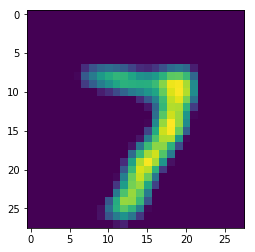

In [8]:
matrix_out = matrix_out.reshape(28, 28)
img = plt.imshow(matrix_out)
img

In [9]:
matrix_in.freebuffer()
# dma_in.stop()

matrix_out.freebuffer()
# dma_out.stop()